#### GUIDING QUESTION:

following Cai's 2013 paper, we explore the impact of mixing between the JDF surface ocean endmember and the Fraser river endmember in the salish sea and its impact on pH and OmegaA

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import arrow
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

In [5]:
BR3_DIC_winter = pickle.load(open('../pkls/BR3_DIC_winter_mean.pkl', 'rb'))  
BR3_DIC_summer = pickle.load(open('../pkls/BR3_DIC_summer_mean.pkl', 'rb'))  

PI4_DIC_winter = pickle.load(open('../pkls/PI4_DIC_winter_mean.pkl', 'rb'))  
PI4_DIC_summer = pickle.load(open('../pkls/PI4_DIC_summer_mean.pkl', 'rb'))  

#br3 and pi4 TA should be the same
PI4_TA_winter = pickle.load(open('../pkls/BR3_TA_winter_mean.pkl', 'rb'))  
PI4_TA_summer = pickle.load(open('../pkls/PI4_TA_summer_mean.pkl', 'rb'))  
PI4_sal_winter = pickle.load(open('../pkls/BR3_sal_winter_mean.pkl', 'rb'))  
PI4_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb'))  


## JdF surface end-member identities
## summer and winter means of leftmost 20 grid points, upper 10m of water column

In [6]:
print('summer DIC BR3, DIC PI4')
BR3_DIC_summer[BR3_DIC_summer == 0] = np.nan
BR3_DIC_summer[BR3_DIC_summer>1e10] = np.nan
summer_surf_em_DIC_BR3 = (np.nanmean(BR3_DIC_summer[0:10,:,0:20]))
print(summer_surf_em_DIC_BR3)
PI4_DIC_summer[PI4_DIC_summer == 0] = np.nan
PI4_DIC_summer[PI4_DIC_summer>1e10] = np.nan
summer_surf_em_DIC_PI4 = (np.nanmean(PI4_DIC_summer[0:10,:,0:20]))
print(summer_surf_em_DIC_PI4)
print('winter DIC BR3, DIC PI4')
BR3_DIC_winter[BR3_DIC_winter == 0] = np.nan
BR3_DIC_winter[BR3_DIC_winter>1e10] = np.nan
winter_surf_em_DIC_BR3 = (np.nanmean(BR3_DIC_winter[0:10,:,0:20]))
print(winter_surf_em_DIC_BR3)
PI4_DIC_winter[PI4_DIC_winter == 0] = np.nan
PI4_DIC_winter[PI4_DIC_winter>1e10] = np.nan
winter_surf_em_DIC_PI4 = (np.nanmean(PI4_DIC_winter[0:10,:,0:20]))
print(winter_surf_em_DIC_PI4)


print('winter_summer_ta')
PI4_TA_winter[PI4_TA_winter == 0] = np.nan
PI4_TA_winter[PI4_TA_winter>1e10] = np.nan
winter_surf_em_TA = (np.nanmean(PI4_TA_winter[0:10,:,0:20]))
print(winter_surf_em_TA)
PI4_TA_summer[PI4_TA_summer == 0] = np.nan
PI4_TA_summer[PI4_TA_summer>1e10] = np.nan
summer_surf_em_TA = (np.nanmean(PI4_TA_summer[0:10,:,0:20]))
print(summer_surf_em_TA)


print('winter_summer_sal')
PI4_sal_winter[PI4_sal_winter == 0] = np.nan
PI4_sal_winter[PI4_sal_winter>1e10] = np.nan
winter_surf_em_sal = (np.nanmean(PI4_sal_winter[0:10,:,0:20]))
print(winter_surf_em_sal)
PI4_sal_summer[PI4_sal_summer == 0] = np.nan
PI4_sal_summer[PI4_sal_summer>1e10] = np.nan
summer_surf_em_sal = (np.nanmean(PI4_sal_summer[0:10,:,0:20]))
print(summer_surf_em_sal)

summer DIC BR3, DIC PI4
2072.9155547743285
2040.3495878767121
winter DIC BR3, DIC PI4
2059.5998403688554
2019.2218257970405
winter_summer_ta
2174.1786835961666
2192.393193617393
winter_summer_sal
30.553842933609033
30.92318718768477


## Winter theoretical end-member mixing (summer looks very similar - replace winter with summer) - (note: AT SURFACE, constant T = 10 deg)

Text(0.5, 0, 'salinity g/kg')

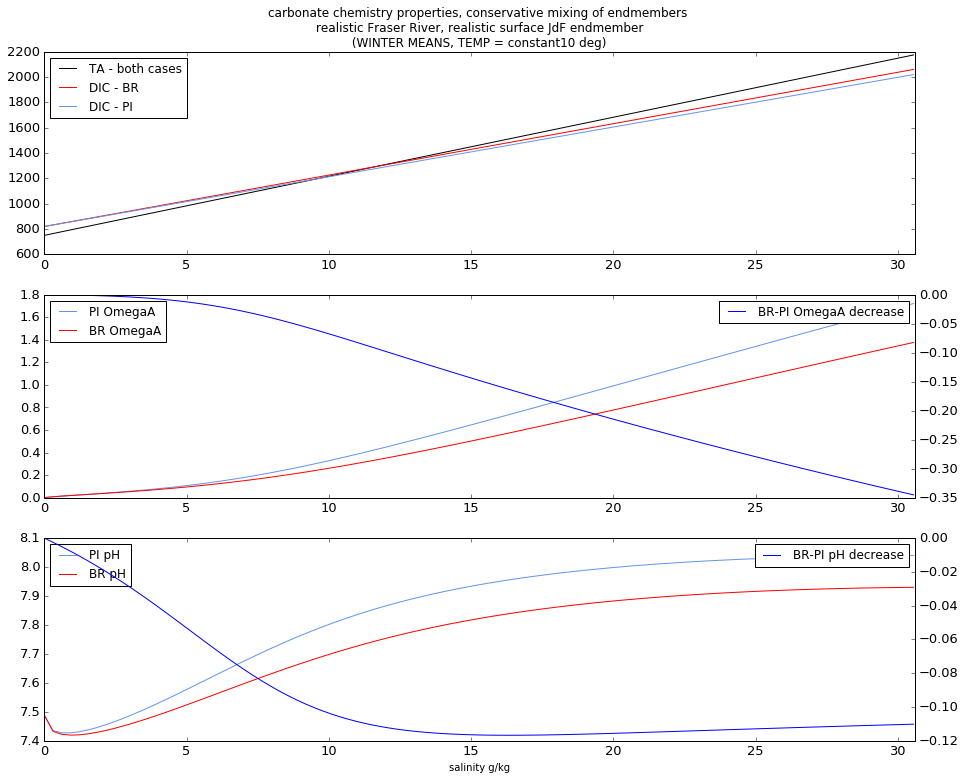

In [7]:
#em - endmember
#am - along mixing
sw_EM_dic_winter = winter_surf_em_DIC_PI4
sw_EM_dic_enh_winter = winter_surf_em_DIC_BR3
sw_EM_sal_winter = winter_surf_em_sal
sw_EM_alk_winter = winter_surf_em_TA
ttemp = 10

fw_EM_sal = 0.0
fw_EM_alk = 750
fw_EM_dic = 820

AM_sal_winter = np.zeros(101)
AM_alk_winter = np.zeros(101)
AM_dic_winter = np.zeros(101)
AM_dic_enh_winter = np.zeros(101)

for i in range(0,101):

    AM_sal_winter[i] = (fw_EM_sal*(i) + sw_EM_sal_winter*(100-i))/100
    AM_alk_winter[i] = (fw_EM_alk*(i) + sw_EM_alk_winter*(100-i))/100
    AM_dic_winter[i] = (fw_EM_dic*(i) + sw_EM_dic_winter*(100-i))/100
    AM_dic_enh_winter[i] = (fw_EM_dic*(i) + sw_EM_dic_enh_winter*(100-i))/100
    
AM_dic_f = np.ravel(AM_dic_winter[:]*1e-3)
AM_dic_enh_f = np.ravel(AM_dic_enh_winter[:]*1e-3)
AM_alk_f = np.ravel(AM_alk_winter[:]*1e-3)
AM_sal_f = np.ravel(AM_sal_winter[:])
AM_temp_f = np.zeros_like(AM_sal_f)
AM_temp_f[:] = ttemp

tzero = np.zeros_like(AM_temp_f)


response_tup = mocsy.mvars(temp=AM_temp_f, sal=AM_sal_f, alk=AM_alk_f, dic=AM_dic_f, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

pH_AM,pco2_AM,fco2,co2,hco3,co3,OmegaA_AM,OmegaC,BetaD,DENis,p,Tis = response_tup

response_tup = mocsy.mvars(temp=AM_temp_f, sal=AM_sal_f, alk=AM_alk_f, dic=AM_dic_enh_f, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

pH_AM_enh,pco2_AM_enh,fco2,co2,hco3,co3,OmegaA_AM_enh,OmegaC,BetaD,DENis,p,Tis = response_tup
       

ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1.3
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot(3,1,1)

ax1.plot(AM_sal_winter,AM_alk_winter, color = 'black', label = 'TA - both cases')
ax1.plot(AM_sal_winter,AM_dic_enh_winter, color = 'red', label = 'DIC - BR')
ax1.plot(AM_sal_winter,AM_dic_winter, color = 'cornflowerblue', label = 'DIC - PI')
plt.xlim([0,30.6])
plt.title('carbonate chemistry properties, conservative mixing of endmembers \n realistic Fraser River, realistic surface JdF endmember \n (WINTER MEANS, TEMP = constant' + str(ttemp) + ' deg) ')
ax1.legend(loc = 'best')

ax1 = plt.subplot(3,1,2)

ax1.plot(AM_sal_winter,OmegaA_AM, color = 'cornflowerblue', label = 'PI OmegaA')
ax1.plot(AM_sal_winter,OmegaA_AM_enh, color = 'red', label = 'BR OmegaA')

ax1b = ax1.twinx()
ax1b.plot(AM_sal_f, OmegaA_AM_enh - OmegaA_AM, label = 'BR-PI OmegaA decrease')
ax1b.legend(loc = 'best')
ax1.legend(loc = 'best')
plt.xlim([0,30.6])    

ax1 = plt.subplot(3,1,3)

ax1.plot(AM_sal_winter,pH_AM, color = 'cornflowerblue', label = 'PI pH')
ax1.plot(AM_sal_winter,pH_AM_enh, color = 'red', label = 'BR pH')

ax1b = ax1.twinx()
ax1b.plot(AM_sal_f, pH_AM_enh - pH_AM, label = 'BR-PI pH decrease')
ax1b.legend(loc = 'best')
ax1.legend(loc = 'upper left')
    
plt.xlim([0,30.6])    
ax1.set_xlabel('salinity g/kg')


### the egleston beta, gamma, omega factors can be easily estimated in Python using partial derivatives; I haven't figured out how to get them to agree when calculated with the explicit formulations in the paper...

In [8]:

def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic):

    tdic_B = tdic_A + del_dic
    
    tzero = 0
    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_A, 
                           sil=tzero, phos=tzero, patm=1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_A,pco2_A,fco2,co2_A,hco3,co3,OmegaA_A,OmegaC,BetaD,DENis,p,Tis = response_tup

    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_B, 
                           sil=tzero, phos=tzero, patm=1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_B,pco2_B,fco2,co2_B,hco3,co3,OmegaA_B,OmegaC,BetaD,DENis,p,Tis = response_tup

    omega_DIC = 1/((np.log(OmegaA_B)-np.log(OmegaA_A))/(del_dic))
    
    Hplus_A = 10**(-1*pH_A); Hplus_B = 10**(-1*pH_B)
    beta_DIC = 1/((np.log(Hplus_B)-np.log(Hplus_A))/(del_dic))
    
    gamma_DIC = 1/((np.log(co2_B)-np.log(co2_A))/(del_dic))
    
    return omega_DIC, beta_DIC, gamma_DIC



Text(0.5, 1.0, '3 egleston buffer factors at alkalinity = 2.25 mM \n depth = 0, T = 20, S = 35')

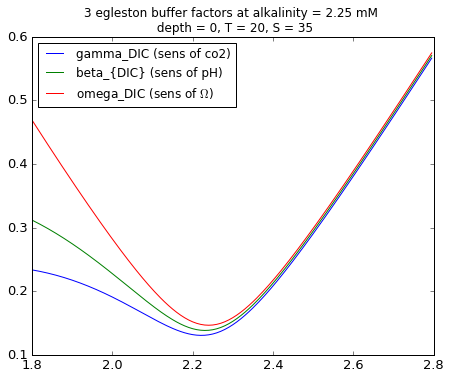

In [9]:
ttemp = 20
tsal = 35
talk = 2.25
dic = np.arange(1.8,2.8,0.005)
omega_DICs = np.zeros_like(dic)
beta_DICs = np.zeros_like(dic)
gamma_DICs = np.zeros_like(dic)
dep = 0
del_dic = 0.005

for i in range(0,len(dic)):
    
    tdic_A = dic[i]
    omega_DIC, beta_DIC, gamma_DIC =\
    calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic)
    
    omega_DICs[i] = omega_DIC
    beta_DICs[i] = beta_DIC
    gamma_DICs[i] = gamma_DIC


ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 0.6
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot(1,1,1)

ax1.plot(dic,gamma_DICs, label = 'gamma_DIC (sens of co2)')
ax1.plot(dic,beta_DICs, label = 'beta_{DIC} (sens of pH)')
ax1.plot(dic,-omega_DICs, label = 'omega_DIC (sens of $\Omega$)')
ax1.legend(loc = 'best')
ax1.set_title('3 egleston buffer factors at alkalinity = 2.25 mM \n depth = 0, T = 20, S = 35')

## Let's apply these buffer factors along the mixing line - how do they shift from the BR to the PI case?

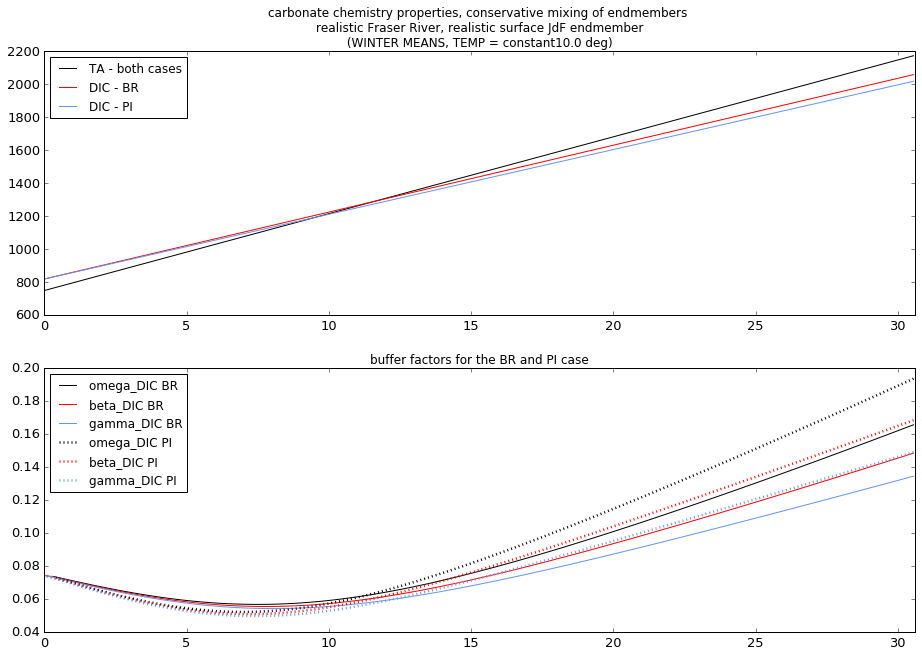

In [10]:
#em - endmember
#am - along mixing
sw_EM_dic_winter = winter_surf_em_DIC_PI4
sw_EM_dic_enh_winter = winter_surf_em_DIC_BR3
sw_EM_sal_winter = winter_surf_em_sal
sw_EM_alk_winter = winter_surf_em_TA
ttemp = 10

fw_EM_sal = 0.0
fw_EM_alk = 750
fw_EM_dic = 820

AM_sal_winter = np.zeros(101)
AM_alk_winter = np.zeros(101)
AM_dic_winter = np.zeros(101)
AM_dic_enh_winter = np.zeros(101)

for i in range(0,101):

    AM_sal_winter[i] = (fw_EM_sal*(i) + sw_EM_sal_winter*(100-i))/100
    AM_alk_winter[i] = (fw_EM_alk*(i) + sw_EM_alk_winter*(100-i))/100
    AM_dic_winter[i] = (fw_EM_dic*(i) + sw_EM_dic_winter*(100-i))/100
    AM_dic_enh_winter[i] = (fw_EM_dic*(i) + sw_EM_dic_enh_winter*(100-i))/100
    
AM_dic_f = np.ravel(AM_dic_winter[:]*1e-3)
AM_dic_enh_f = np.ravel(AM_dic_enh_winter[:]*1e-3)
AM_alk_f = np.ravel(AM_alk_winter[:]*1e-3)
AM_sal_f = np.ravel(AM_sal_winter[:])
AM_temp_f = np.zeros_like(AM_sal_f)
AM_temp_f[:] = ttemp
omega_DICs_PI = np.zeros_like(AM_sal_f)
beta_DICs_PI = np.zeros_like(AM_sal_f)
gamma_DICs_PI = np.zeros_like(AM_sal_f)
omega_DICs_BR = np.zeros_like(AM_sal_f)
beta_DICs_BR = np.zeros_like(AM_sal_f)
gamma_DICs_BR = np.zeros_like(AM_sal_f)

for i in range(0,len(AM_dic_f)):
    
    tdic_A = AM_dic_f[i]
    ttemp = AM_temp_f[i]
    tsal = AM_sal_f[i]
    talk = AM_alk_f[i]
    dep = 0
    del_dic = 0.005
    omega_DIC, beta_DIC, gamma_DIC =\
    calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic)
    
    omega_DICs_PI[i] = omega_DIC
    beta_DICs_PI[i] = beta_DIC
    gamma_DICs_PI[i] = gamma_DIC

    tdic_A = AM_dic_enh_f[i]
    omega_DIC, beta_DIC, gamma_DIC =\
    calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic)
    
    omega_DICs_BR[i] = omega_DIC
    beta_DICs_BR[i] = beta_DIC
    gamma_DICs_BR[i] = gamma_DIC

    
ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1.3
fig = plt.figure(figsize=(12*fact, 8*fact))

ax1 = plt.subplot(2,1,1)

ax1.plot(AM_sal_winter,AM_alk_winter, color = 'black', label = 'TA - both cases')
ax1.plot(AM_sal_winter,AM_dic_enh_winter, color = 'red', label = 'DIC - BR')
ax1.plot(AM_sal_winter,AM_dic_winter, color = 'cornflowerblue', label = 'DIC - PI')
plt.xlim([0,30.6])
plt.title('carbonate chemistry properties, conservative mixing of endmembers \n realistic Fraser River, realistic surface JdF endmember \n (WINTER MEANS, TEMP = constant' + str(ttemp) + ' deg) ')
ax1.legend(loc = 'best')

ax1 = plt.subplot(2,1,2)

ax1.plot(AM_sal_winter,-omega_DICs_BR, color = 'black', label = 'omega_DIC BR')
ax1.plot(AM_sal_winter,beta_DICs_BR, color = 'red', label = 'beta_DIC BR')
ax1.plot(AM_sal_winter,gamma_DICs_BR, color = 'cornflowerblue', label = 'gamma_DIC BR')
plt.xlim([0,30.6])
plt.title('buffer factors for the BR and PI case')

ax1.plot(AM_sal_winter,-omega_DICs_PI, linewidth = 2.5, linestyle = ':',color = 'black', label = 'omega_DIC PI')
ax1.plot(AM_sal_winter,beta_DICs_PI, linewidth = 2.5, linestyle = ':',color = 'red', label = 'beta_DIC PI')
ax1.plot(AM_sal_winter,gamma_DICs_PI, linewidth = 2.5, linestyle = ':',color = 'cornflowerblue', label = 'gamma_DIC PI')
plt.xlim([0,30.6])

ax1.legend(loc = 'best')




## let's look at whether buffer factors change meaningfully with depth

No?

Text(0.5, 1.0, '3 egleston buffer factors at alkalinity = 2.25 mM \n depth = 0, T = 20, S = 35')

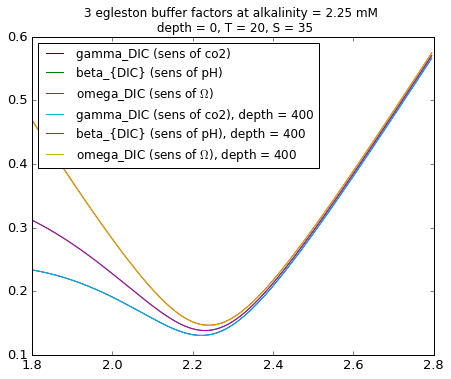

In [11]:
ttemp = 20
tsal = 35
talk = 2.25
dic = np.arange(1.8,2.8,0.005)
omega_DICs_0 = np.zeros_like(dic)
beta_DICs_0 = np.zeros_like(dic)
gamma_DICs_0 = np.zeros_like(dic)
dep = 0
del_dic = 0.005

for i in range(0,len(dic)):
    
    tdic_A = dic[i]
    omega_DIC, beta_DIC, gamma_DIC =\
    calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic)
    
    omega_DICs_0[i] = omega_DIC
    beta_DICs_0[i] = beta_DIC
    gamma_DICs_0[i] = gamma_DIC

omega_DICs_400 = np.zeros_like(dic)
beta_DICs_400 = np.zeros_like(dic)
gamma_DICs_400 = np.zeros_like(dic)
dep = 400
del_dic = 0.005

for i in range(0,len(dic)):
    
    tdic_A = dic[i]
    omega_DIC, beta_DIC, gamma_DIC =\
    calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic)
    
    omega_DICs_400[i] = omega_DIC
    beta_DICs_400[i] = beta_DIC
    gamma_DICs_400[i] = gamma_DIC

omega_DICs_4000 = np.zeros_like(dic)
beta_DICs_4000 = np.zeros_like(dic)
gamma_DICs_4000 = np.zeros_like(dic)
dep = 4000
del_dic = 0.005

for i in range(0,len(dic)):
    
    tdic_A = dic[i]
    omega_DIC, beta_DIC, gamma_DIC =\
    calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic)
    
    omega_DICs_4000[i] = omega_DIC
    beta_DICs_4000[i] = beta_DIC
    gamma_DICs_4000[i] = gamma_DIC
    
    
ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 0.6
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot(1,1,1)

ax1.plot(dic,gamma_DICs_0, label = 'gamma_DIC (sens of co2)')
ax1.plot(dic,beta_DICs_0, label = 'beta_{DIC} (sens of pH)')
ax1.plot(dic,-omega_DICs_0, label = 'omega_DIC (sens of $\Omega$)')

ax1.plot(dic,gamma_DICs_400, label = 'gamma_DIC (sens of co2), depth = 400')
ax1.plot(dic,beta_DICs_400, label = 'beta_{DIC} (sens of pH), depth = 400')
ax1.plot(dic,-omega_DICs_400, label = 'omega_DIC (sens of $\Omega$), depth = 400')


ax1.legend(loc = 'best')
ax1.set_title('3 egleston buffer factors at alkalinity = 2.25 mM \n depth = 0, T = 20, S = 35')

Text(0.5, 1.0, '3 egleston buffer factors - difference at depth = 0 - depth = 400')

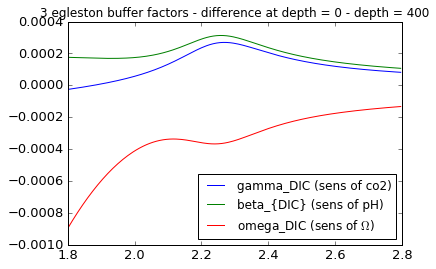

In [12]:
ax1 = plt.subplot(1,1,1)

ax1.plot(dic,gamma_DICs_0-gamma_DICs_400, label = 'gamma_DIC (sens of co2)')
ax1.plot(dic,beta_DICs_0-beta_DICs_400, label = 'beta_{DIC} (sens of pH)')
ax1.plot(dic,omega_DICs_0-omega_DICs_400, label = 'omega_DIC (sens of $\Omega$)')
ax1.legend(loc = 'best')
ax1.set_title('3 egleston buffer factors - difference at depth = 0 - depth = 400')

## let's look at representative winter and summer depth profiles from our JDF and Fraser Plume station

In [13]:
BR3_DIC_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
BR3_TA_jdf = pickle.load(open('../pkls/BR3_TA_means_jdf_BOX.pkl','rb'))
BR3_sal_jdf = pickle.load(open('../pkls/BR3_sal_means_jdf_BOX.pkl','rb'))
BR3_temp_jdf = pickle.load(open('../pkls/BR3_temp_means_jdf_BOX.pkl','rb'))

PI4_DIC_jdf = pickle.load(open('../pkls/PI4_DIC_means_jdf_BOX.pkl','rb'))
PI4_TA_jdf = pickle.load(open('../pkls/PI4_TA_means_jdf_BOX.pkl','rb'))
PI4_sal_jdf = pickle.load(open('../pkls/PI4_sal_means_jdf_BOX.pkl','rb'))
PI4_temp_jdf = pickle.load(open('../pkls/PI4_temp_means_jdf_BOX.pkl','rb'))

BR3_DIC_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
BR3_TA_cs2 = pickle.load(open('../pkls/BR3_TA_means_cs2_BOX.pkl','rb'))
BR3_sal_cs2 = pickle.load(open('../pkls/BR3_sal_means_cs2_BOX.pkl','rb'))
BR3_temp_cs2 = pickle.load(open('../pkls/BR3_temp_means_cs2_BOX.pkl','rb'))

PI4_DIC_cs2 = pickle.load(open('../pkls/PI4_DIC_means_cs2_BOX.pkl','rb'))
PI4_TA_cs2 = pickle.load(open('../pkls/PI4_TA_means_cs2_BOX.pkl','rb'))
PI4_sal_cs2 = pickle.load(open('../pkls/PI4_sal_means_cs2_BOX.pkl','rb'))
PI4_temp_cs2 = pickle.load(open('../pkls/PI4_temp_means_cs2_BOX.pkl','rb'))



BR3_DIC_cs2_summer =np.nanmean(BR3_DIC_cs2[:,152:244], axis = 1)
BR3_TA_cs2_summer = np.nanmean(BR3_TA_cs2[:,152:244], axis = 1)
BR3_sal_cs2_summer = np.nanmean(BR3_sal_cs2[:,152:244], axis = 1)
BR3_temp_cs2_summer = np.nanmean(BR3_temp_cs2[:,152:244], axis = 1)

BR3_DIC_cs2_winter = \
np.nanmean(np.concatenate((BR3_DIC_cs2[:,0:59],BR3_DIC_cs2[:,335:365]), axis =1 ),axis = 1)
BR3_TA_cs2_winter = \
np.nanmean(np.concatenate((BR3_TA_cs2[:,0:59],BR3_TA_cs2[:,335:365]), axis =1 ),axis = 1)
BR3_sal_cs2_winter = \
np.nanmean(np.concatenate((BR3_sal_cs2[:,0:59],BR3_sal_cs2[:,335:365]), axis =1 ),axis = 1)
BR3_temp_cs2_winter = \
np.nanmean(np.concatenate((BR3_temp_cs2[:,0:59],BR3_temp_cs2[:,335:365]), axis =1 ),axis = 1)

BR3_DIC_jdf_summer =np.nanmean(BR3_DIC_jdf[:,152:244], axis = 1)
BR3_TA_jdf_summer = np.nanmean(BR3_TA_jdf[:,152:244], axis = 1)
BR3_sal_jdf_summer = np.nanmean(BR3_sal_jdf[:,152:244], axis = 1)
BR3_temp_jdf_summer = np.nanmean(BR3_temp_jdf[:,152:244], axis = 1)

BR3_DIC_jdf_winter = \
np.nanmean(np.concatenate((BR3_DIC_jdf[:,0:59],BR3_DIC_jdf[:,335:365]), axis =1 ),axis = 1)
BR3_TA_jdf_winter = \
np.nanmean(np.concatenate((BR3_TA_jdf[:,0:59],BR3_TA_jdf[:,335:365]), axis =1 ),axis = 1)
BR3_sal_jdf_winter = \
np.nanmean(np.concatenate((BR3_sal_jdf[:,0:59],BR3_sal_jdf[:,335:365]), axis =1 ),axis = 1)
p
BR3_temp_jdf_winter = \
np.nanmean(np.concatenate((BR3_temp_jdf[:,0:59],BR3_temp_jdf[:,335:365]), axis =1 ),axis = 1)


PI4_DIC_cs2_summer =np.nanmean(PI4_DIC_cs2[:,152:244], axis = 1)
PI4_TA_cs2_summer = np.nanmean(PI4_TA_cs2[:,152:244], axis = 1)
PI4_sal_cs2_summer = np.nanmean(PI4_sal_cs2[:,152:244], axis = 1)
PI4_temp_cs2_summer = np.nanmean(PI4_temp_cs2[:,152:244], axis = 1)

PI4_DIC_cs2_winter = \
np.nanmean(np.concatenate((PI4_DIC_cs2[:,0:59],PI4_DIC_cs2[:,335:365]), axis =1 ),axis = 1)
PI4_TA_cs2_winter = \
np.nanmean(np.concatenate((PI4_TA_cs2[:,0:59],PI4_TA_cs2[:,335:365]), axis =1 ),axis = 1)
PI4_sal_cs2_winter = \
np.nanmean(np.concatenate((PI4_sal_cs2[:,0:59],PI4_sal_cs2[:,335:365]), axis =1 ),axis = 1)
PI4_temp_cs2_winter = \
np.nanmean(np.concatenate((PI4_temp_cs2[:,0:59],PI4_temp_cs2[:,335:365]), axis =1 ),axis = 1)

PI4_DIC_jdf_summer =np.nanmean(PI4_DIC_jdf[:,152:244], axis = 1)
PI4_TA_jdf_summer = np.nanmean(PI4_TA_jdf[:,152:244], axis = 1)
PI4_sal_jdf_summer = np.nanmean(PI4_sal_jdf[:,152:244], axis = 1)
PI4_temp_jdf_summer = np.nanmean(PI4_temp_jdf[:,152:244], axis = 1)

PI4_DIC_jdf_winter = \
np.nanmean(np.concatenate((PI4_DIC_jdf[:,0:59],PI4_DIC_jdf[:,335:365]), axis =1 ),axis = 1)
PI4_TA_jdf_winter = \
np.nanmean(np.concatenate((PI4_TA_jdf[:,0:59],PI4_TA_jdf[:,335:365]), axis =1 ),axis = 1)
PI4_sal_jdf_winter = \
np.nanmean(np.concatenate((PI4_sal_jdf[:,0:59],PI4_sal_jdf[:,335:365]), axis =1 ),axis = 1)
p
PI4_temp_jdf_winter = \
np.nanmean(np.concatenate((PI4_temp_jdf[:,0:59],PI4_temp_jdf[:,335:365]), axis =1 ),axis = 1)


depths = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depth = depths['gdept_1d'][0,:]



In [14]:
tz = np.zeros_like(depth)
response_tup = mocsy.mvars(temp=PI4_temp_jdf_winter, sal=PI4_sal_jdf_winter,
                           alk=PI4_TA_jdf_winter*1e-3, dic=PI4_DIC_jdf_winter*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

PI4_pH_jdf_winter,pco2_AM,fco2,co2,hco3,co3,PI4_OmA_jdf_winter,OmegaC,BetaD,DENis,p,Tis\
= response_tup

response_tup = mocsy.mvars(temp=PI4_temp_cs2_winter, sal=PI4_sal_cs2_winter,
                           alk=PI4_TA_cs2_winter*1e-3, dic=PI4_DIC_cs2_winter*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

PI4_pH_cs2_winter,pco2_AM,fco2,co2,hco3,co3,PI4_OmA_cs2_winter,OmegaC,BetaD,DENis,p,Tis\
= response_tup

response_tup = mocsy.mvars(temp=PI4_temp_jdf_summer, sal=PI4_sal_jdf_summer,
                           alk=PI4_TA_jdf_summer*1e-3, dic=PI4_DIC_jdf_summer*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

PI4_pH_jdf_summer,pco2_AM,fco2,co2,hco3,co3,PI4_OmA_jdf_summer,OmegaC,BetaD,DENis,p,Tis\
= response_tup

response_tup = mocsy.mvars(temp=PI4_temp_cs2_summer, sal=PI4_sal_cs2_summer,
                           alk=PI4_TA_cs2_summer*1e-3, dic=PI4_DIC_cs2_summer*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

PI4_pH_cs2_summer,pco2_AM,fco2,co2,hco3,co3,PI4_OmA_cs2_summer,OmegaC,BetaD,DENis,p,Tis\
= response_tup

response_tup = mocsy.mvars(temp=BR3_temp_jdf_winter, sal=BR3_sal_jdf_winter,
                           alk=BR3_TA_jdf_winter*1e-3, dic=BR3_DIC_jdf_winter*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

BR3_pH_jdf_winter,pco2_AM,fco2,co2,hco3,co3,BR3_OmA_jdf_winter,OmegaC,BetaD,DENis,p,Tis\
= response_tup

response_tup = mocsy.mvars(temp=BR3_temp_cs2_winter, sal=BR3_sal_cs2_winter,
                           alk=BR3_TA_cs2_winter*1e-3, dic=BR3_DIC_cs2_winter*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

BR3_pH_cs2_winter,pco2_AM,fco2,co2,hco3,co3,BR3_OmA_cs2_winter,OmegaC,BetaD,DENis,p,Tis\
= response_tup

response_tup = mocsy.mvars(temp=BR3_temp_jdf_summer, sal=BR3_sal_jdf_summer,
                           alk=BR3_TA_jdf_summer*1e-3, dic=BR3_DIC_jdf_summer*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

BR3_pH_jdf_summer,pco2_AM,fco2,co2,hco3,co3,BR3_OmA_jdf_summer,OmegaC,BetaD,DENis,p,Tis\
= response_tup

response_tup = mocsy.mvars(temp=BR3_temp_cs2_summer, sal=BR3_sal_cs2_summer,
                           alk=BR3_TA_cs2_summer*1e-3, dic=BR3_DIC_cs2_summer*1e-3, 
                       sil=tz, phos=tz, patm=tz+1, depth=depth, lat=tz, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',optb = 'l10',
                           optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

BR3_pH_cs2_summer,pco2_AM,fco2,co2,hco3,co3,BR3_OmA_cs2_summer,OmegaC,BetaD,DENis,p,Tis\
= response_tup



In [15]:
BR3_pH_cs2_summer[BR3_pH_cs2_summer>1e10] = np.nan
BR3_pH_jdf_summer[BR3_pH_jdf_summer>1e10] = np.nan
PI4_pH_cs2_summer[PI4_pH_cs2_summer>1e10] = np.nan
PI4_pH_jdf_summer[PI4_pH_jdf_summer>1e10] = np.nan
BR3_pH_cs2_winter[BR3_pH_cs2_winter>1e10] = np.nan
BR3_pH_jdf_winter[BR3_pH_jdf_winter>1e10] = np.nan
PI4_pH_cs2_winter[PI4_pH_cs2_winter>1e10] = np.nan
PI4_pH_jdf_winter[PI4_pH_jdf_winter>1e10] = np.nan
BR3_OmA_cs2_summer[BR3_OmA_cs2_summer>1e10] = np.nan
BR3_OmA_jdf_summer[BR3_OmA_jdf_summer>1e10] = np.nan
PI4_OmA_cs2_summer[PI4_OmA_cs2_summer>1e10] = np.nan
PI4_OmA_jdf_summer[PI4_OmA_jdf_summer>1e10] = np.nan
BR3_OmA_cs2_winter[BR3_OmA_cs2_winter>1e10] = np.nan
BR3_OmA_jdf_winter[BR3_OmA_jdf_winter>1e10] = np.nan
PI4_OmA_cs2_winter[PI4_OmA_cs2_winter>1e10] = np.nan
PI4_OmA_jdf_winter[PI4_OmA_jdf_winter>1e10] = np.nan

In [16]:

def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic):

    tdic_B = tdic_A + del_dic
    
    tzero = np.zeros_like(tdic_A)
    
    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_A, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_A,pco2_A,fco2,co2_A,hco3,co3,OmegaA_A,OmegaC,BetaD,DENis,p,Tis = response_tup

    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_B, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_B,pco2_B,fco2,co2_B,hco3,co3,OmegaA_B,OmegaC,BetaD,DENis,p,Tis = response_tup

    omega_DIC = 1/((np.log(OmegaA_B)-np.log(OmegaA_A))/(del_dic))
    
    Hplus_A = 10**(-1*pH_A); Hplus_B = 10**(-1*pH_B)
    beta_DIC = 1/((np.log(Hplus_B)-np.log(Hplus_A))/(del_dic))
    
    gamma_DIC = 1/((np.log(co2_B)-np.log(co2_A))/(del_dic))
    
    return omega_DIC, beta_DIC, gamma_DIC



In [17]:
PI4_omega_DIC_jdf_winter, PI4_beta_DIC_jdf_winter, PI4_gamma_DIC_jdf_winter = \
calculate_Egleston_factors\
(PI4_temp_jdf_winter, PI4_sal_jdf_winter, PI4_TA_jdf_winter*1e-3, PI4_DIC_jdf_winter*1e-3, depth, 0.01)

PI4_omega_DIC_jdf_summer, PI4_beta_DIC_jdf_summer, PI4_gamma_DIC_jdf_summer = \
calculate_Egleston_factors\
(PI4_temp_jdf_summer, PI4_sal_jdf_summer, PI4_TA_jdf_summer*1e-3, PI4_DIC_jdf_summer*1e-3, depth, 0.01)

BR3_omega_DIC_jdf_winter, BR3_beta_DIC_jdf_winter, BR3_gamma_DIC_jdf_winter = \
calculate_Egleston_factors\
(BR3_temp_jdf_winter, BR3_sal_jdf_winter, BR3_TA_jdf_winter*1e-3, BR3_DIC_jdf_winter*1e-3, depth, 0.01)

BR3_omega_DIC_jdf_summer, BR3_beta_DIC_jdf_summer, BR3_gamma_DIC_jdf_summer = \
calculate_Egleston_factors\
(BR3_temp_jdf_summer, BR3_sal_jdf_summer, BR3_TA_jdf_summer*1e-3, BR3_DIC_jdf_summer*1e-3, depth, 0.01)

PI4_omega_DIC_cs2_winter, PI4_beta_DIC_cs2_winter, PI4_gamma_DIC_cs2_winter = \
calculate_Egleston_factors\
(PI4_temp_cs2_winter, PI4_sal_cs2_winter, PI4_TA_cs2_winter*1e-3, PI4_DIC_cs2_winter*1e-3, depth, 0.01)

PI4_omega_DIC_cs2_summer, PI4_beta_DIC_cs2_summer, PI4_gamma_DIC_cs2_summer = \
calculate_Egleston_factors\
(PI4_temp_cs2_summer, PI4_sal_cs2_summer, PI4_TA_cs2_summer*1e-3, PI4_DIC_cs2_summer*1e-3, depth, 0.01)

BR3_omega_DIC_cs2_winter, BR3_beta_DIC_cs2_winter, BR3_gamma_DIC_cs2_winter = \
calculate_Egleston_factors\
(BR3_temp_cs2_winter, BR3_sal_cs2_winter, BR3_TA_cs2_winter*1e-3, BR3_DIC_cs2_winter*1e-3, depth, 0.01)

BR3_omega_DIC_cs2_summer, BR3_beta_DIC_cs2_summer, BR3_gamma_DIC_cs2_summer = \
calculate_Egleston_factors\
(BR3_temp_cs2_summer, BR3_sal_cs2_summer, BR3_TA_cs2_summer*1e-3, BR3_DIC_cs2_summer*1e-3, depth, 0.01)

(40,)


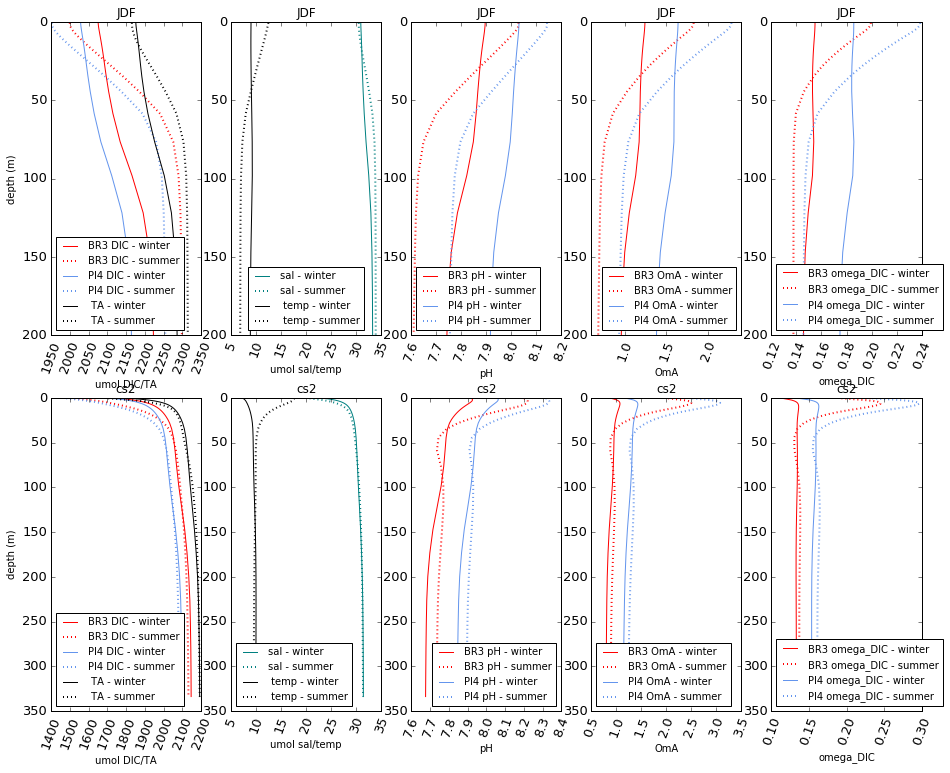

In [18]:
print(np.shape(BR3_temp_jdf_winter))
fact = 1.3
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot(2,5,1)
ax1.invert_yaxis()
ax1.plot(BR3_DIC_jdf_winter,depth, color = 'red', label = 'BR3 DIC - winter')
ax1.plot(BR3_DIC_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 DIC - summer')
ax1.plot(PI4_DIC_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 DIC - winter')
ax1.plot(PI4_DIC_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 DIC - summer')
ax1.plot(PI4_TA_jdf_winter,depth, color = 'black', label = ' TA - winter')
ax1.plot(PI4_TA_jdf_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' TA - summer')
ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('umol DIC/TA')
ax1.set_ylabel('depth (m)')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,2)
ax1.invert_yaxis()
ax1.plot(BR3_sal_jdf_winter,depth, color = 'teal', label = 'sal - winter')
ax1.plot(BR3_sal_jdf_summer,depth, color = 'teal', \
         linestyle = ':', lw = 2, label = 'sal - summer')
ax1.plot(PI4_temp_jdf_winter,depth, color = 'black', label = ' temp - winter')
ax1.plot(PI4_temp_jdf_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' temp - summer')
ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('umol sal/temp')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,3)
ax1.invert_yaxis()
ax1.plot(BR3_pH_jdf_winter,depth, color = 'red', label = 'BR3 pH - winter')
ax1.plot(BR3_pH_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 pH - summer')
ax1.plot(PI4_pH_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 pH - winter')
ax1.plot(PI4_pH_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 pH - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('pH')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,4)
ax1.invert_yaxis()
ax1.plot(BR3_OmA_jdf_winter,depth, color = 'red', label = 'BR3 OmA - winter')
ax1.plot(BR3_OmA_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 OmA - summer')
ax1.plot(PI4_OmA_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 OmA - winter')
ax1.plot(PI4_OmA_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 OmA - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('OmA')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,5)
ax1.invert_yaxis()
ax1.plot(-BR3_omega_DIC_jdf_winter,depth, color = 'red', label = 'BR3 omega_DIC - winter')
ax1.plot(-BR3_omega_DIC_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 omega_DIC - summer')
ax1.plot(-PI4_omega_DIC_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 omega_DIC - winter')
ax1.plot(-PI4_omega_DIC_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 omega_DIC - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('omega_DIC')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)


ax1 = plt.subplot(2,5,8)
ax1.invert_yaxis()
ax1.plot(BR3_pH_cs2_winter,depth, color = 'red', label = 'BR3 pH - winter')
ax1.plot(BR3_pH_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 pH - summer')
ax1.plot(PI4_pH_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 pH - winter')
ax1.plot(PI4_pH_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 pH - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('pH')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,9)
ax1.invert_yaxis()
ax1.plot(BR3_OmA_cs2_winter,depth, color = 'red', label = 'BR3 OmA - winter')
ax1.plot(BR3_OmA_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 OmA - summer')
ax1.plot(PI4_OmA_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 OmA - winter')
ax1.plot(PI4_OmA_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 OmA - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('OmA')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)


ax1 = plt.subplot(2,5,10)
ax1.invert_yaxis()
ax1.plot(-BR3_omega_DIC_cs2_winter,depth, color = 'red', label = 'BR3 omega_DIC - winter')
ax1.plot(-BR3_omega_DIC_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 omega_DIC - summer')
ax1.plot(-PI4_omega_DIC_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 omega_DIC - winter')
ax1.plot(-PI4_omega_DIC_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 omega_DIC - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('omega_DIC')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)





ax1 = plt.subplot(2,5,6)
ax1.invert_yaxis()
ax1.plot(BR3_DIC_cs2_winter,depth, color = 'red', label = 'BR3 DIC - winter')
ax1.plot(BR3_DIC_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 DIC - summer')
ax1.plot(PI4_DIC_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 DIC - winter')
ax1.plot(PI4_DIC_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 DIC - summer')
ax1.plot(PI4_TA_cs2_winter,depth, color = 'black', label = ' TA - winter')
ax1.plot(PI4_TA_cs2_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' TA - summer')
ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('umol DIC/TA')
ax1.set_ylabel('depth (m)')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,7)
ax1.invert_yaxis()
ax1.plot(BR3_sal_cs2_winter,depth, color = 'teal', label = 'sal - winter')
ax1.plot(BR3_sal_cs2_summer,depth, color = 'teal', \
         linestyle = ':', lw = 2, label = 'sal - summer')
ax1.plot(PI4_temp_cs2_winter,depth, color = 'black', label = ' temp - winter')
ax1.plot(PI4_temp_cs2_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' temp - summer')
ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('umol sal/temp')
ax1.legend(loc = 'best', fontsize = 10)

w = plt.xticks(rotation=70)

plt.savefig('Omega_DIC.png')

(40,)


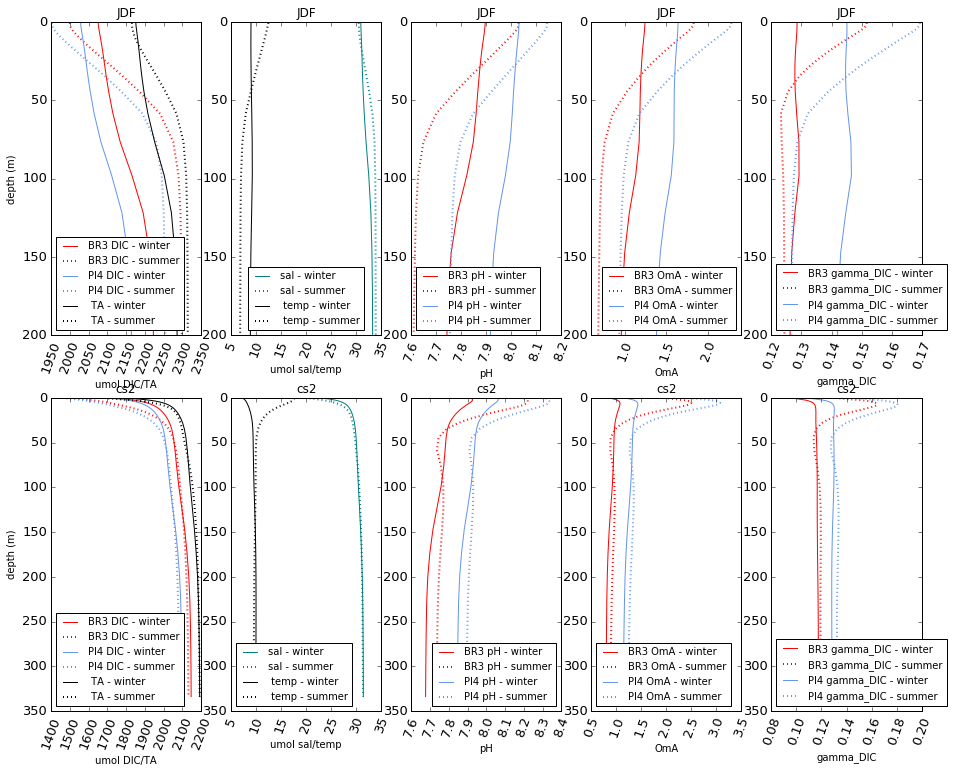

In [19]:
print(np.shape(BR3_temp_jdf_winter))
fact = 1.3
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot(2,5,1)
ax1.invert_yaxis()
ax1.plot(BR3_DIC_jdf_winter,depth, color = 'red', label = 'BR3 DIC - winter')
ax1.plot(BR3_DIC_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 DIC - summer')
ax1.plot(PI4_DIC_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 DIC - winter')
ax1.plot(PI4_DIC_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 DIC - summer')
ax1.plot(PI4_TA_jdf_winter,depth, color = 'black', label = ' TA - winter')
ax1.plot(PI4_TA_jdf_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' TA - summer')
ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('umol DIC/TA')
ax1.set_ylabel('depth (m)')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,2)
ax1.invert_yaxis()
ax1.plot(BR3_sal_jdf_winter,depth, color = 'teal', label = 'sal - winter')
ax1.plot(BR3_sal_jdf_summer,depth, color = 'teal', \
         linestyle = ':', lw = 2, label = 'sal - summer')
ax1.plot(PI4_temp_jdf_winter,depth, color = 'black', label = ' temp - winter')
ax1.plot(PI4_temp_jdf_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' temp - summer')
ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('umol sal/temp')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,3)
ax1.invert_yaxis()
ax1.plot(BR3_pH_jdf_winter,depth, color = 'red', label = 'BR3 pH - winter')
ax1.plot(BR3_pH_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 pH - summer')
ax1.plot(PI4_pH_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 pH - winter')
ax1.plot(PI4_pH_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 pH - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('pH')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,4)
ax1.invert_yaxis()
ax1.plot(BR3_OmA_jdf_winter,depth, color = 'red', label = 'BR3 OmA - winter')
ax1.plot(BR3_OmA_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 OmA - summer')
ax1.plot(PI4_OmA_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 OmA - winter')
ax1.plot(PI4_OmA_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 OmA - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('OmA')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,5)
ax1.invert_yaxis()
ax1.plot(BR3_gamma_DIC_jdf_winter,depth, color = 'red', label = 'BR3 gamma_DIC - winter')
ax1.plot(BR3_gamma_DIC_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 gamma_DIC - summer')
ax1.plot(PI4_gamma_DIC_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 gamma_DIC - winter')
ax1.plot(PI4_gamma_DIC_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 gamma_DIC - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('gamma_DIC')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)


ax1 = plt.subplot(2,5,8)
ax1.invert_yaxis()
ax1.plot(BR3_pH_cs2_winter,depth, color = 'red', label = 'BR3 pH - winter')
ax1.plot(BR3_pH_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 pH - summer')
ax1.plot(PI4_pH_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 pH - winter')
ax1.plot(PI4_pH_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 pH - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('pH')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,9)
ax1.invert_yaxis()
ax1.plot(BR3_OmA_cs2_winter,depth, color = 'red', label = 'BR3 OmA - winter')
ax1.plot(BR3_OmA_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 OmA - summer')
ax1.plot(PI4_OmA_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 OmA - winter')
ax1.plot(PI4_OmA_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 OmA - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('OmA')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)


ax1 = plt.subplot(2,5,10)
ax1.invert_yaxis()
ax1.plot(BR3_gamma_DIC_cs2_winter,depth, color = 'red', label = 'BR3 gamma_DIC - winter')
ax1.plot(BR3_gamma_DIC_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 gamma_DIC - summer')
ax1.plot(PI4_gamma_DIC_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 gamma_DIC - winter')
ax1.plot(PI4_gamma_DIC_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 gamma_DIC - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('gamma_DIC')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)





ax1 = plt.subplot(2,5,6)
ax1.invert_yaxis()
ax1.plot(BR3_DIC_cs2_winter,depth, color = 'red', label = 'BR3 DIC - winter')
ax1.plot(BR3_DIC_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 DIC - summer')
ax1.plot(PI4_DIC_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 DIC - winter')
ax1.plot(PI4_DIC_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 DIC - summer')
ax1.plot(PI4_TA_cs2_winter,depth, color = 'black', label = ' TA - winter')
ax1.plot(PI4_TA_cs2_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' TA - summer')
ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('umol DIC/TA')
ax1.set_ylabel('depth (m)')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,7)
ax1.invert_yaxis()
ax1.plot(BR3_sal_cs2_winter,depth, color = 'teal', label = 'sal - winter')
ax1.plot(BR3_sal_cs2_summer,depth, color = 'teal', \
         linestyle = ':', lw = 2, label = 'sal - summer')
ax1.plot(PI4_temp_cs2_winter,depth, color = 'black', label = ' temp - winter')
ax1.plot(PI4_temp_cs2_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' temp - summer')
ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('umol sal/temp')
ax1.legend(loc = 'best', fontsize = 10)

w = plt.xticks(rotation=70)

plt.savefig('gamma_DIC.png')

(40,)


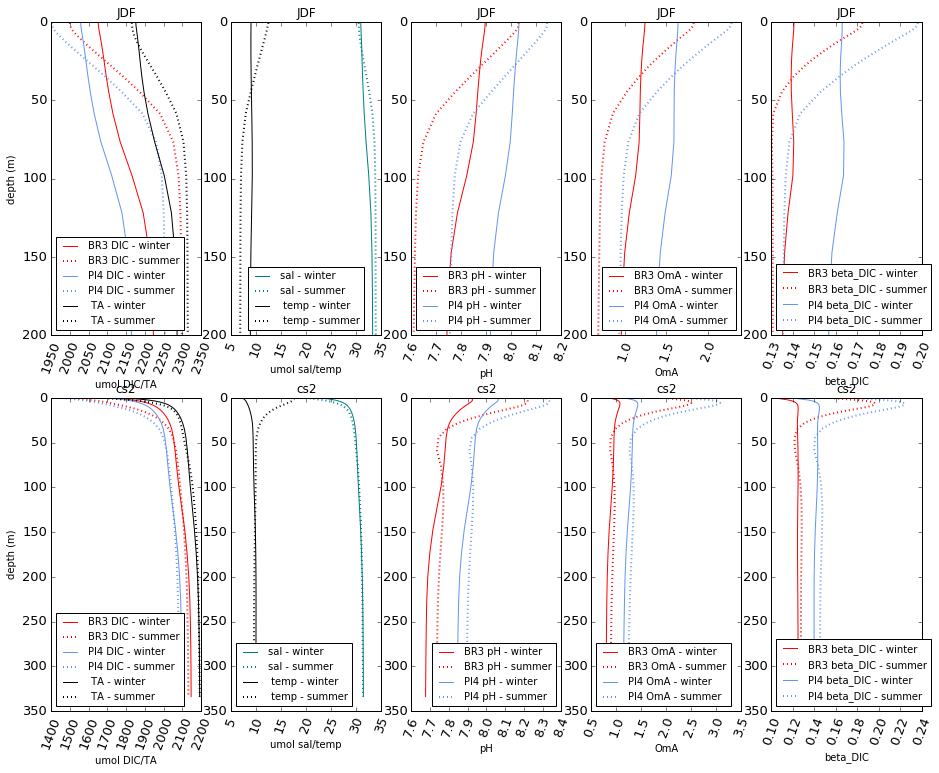

In [20]:
print(np.shape(BR3_temp_jdf_winter))
fact = 1.3
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot(2,5,1)
ax1.invert_yaxis()
ax1.plot(BR3_DIC_jdf_winter,depth, color = 'red', label = 'BR3 DIC - winter')
ax1.plot(BR3_DIC_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 DIC - summer')
ax1.plot(PI4_DIC_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 DIC - winter')
ax1.plot(PI4_DIC_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 DIC - summer')
ax1.plot(PI4_TA_jdf_winter,depth, color = 'black', label = ' TA - winter')
ax1.plot(PI4_TA_jdf_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' TA - summer')
ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('umol DIC/TA')
ax1.set_ylabel('depth (m)')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,2)
ax1.invert_yaxis()
ax1.plot(BR3_sal_jdf_winter,depth, color = 'teal', label = 'sal - winter')
ax1.plot(BR3_sal_jdf_summer,depth, color = 'teal', \
         linestyle = ':', lw = 2, label = 'sal - summer')
ax1.plot(PI4_temp_jdf_winter,depth, color = 'black', label = ' temp - winter')
ax1.plot(PI4_temp_jdf_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' temp - summer')
ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('umol sal/temp')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,3)
ax1.invert_yaxis()
ax1.plot(BR3_pH_jdf_winter,depth, color = 'red', label = 'BR3 pH - winter')
ax1.plot(BR3_pH_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 pH - summer')
ax1.plot(PI4_pH_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 pH - winter')
ax1.plot(PI4_pH_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 pH - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('pH')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,4)
ax1.invert_yaxis()
ax1.plot(BR3_OmA_jdf_winter,depth, color = 'red', label = 'BR3 OmA - winter')
ax1.plot(BR3_OmA_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 OmA - summer')
ax1.plot(PI4_OmA_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 OmA - winter')
ax1.plot(PI4_OmA_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 OmA - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('OmA')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,5)
ax1.invert_yaxis()
ax1.plot(BR3_beta_DIC_jdf_winter,depth, color = 'red', label = 'BR3 beta_DIC - winter')
ax1.plot(BR3_beta_DIC_jdf_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 beta_DIC - summer')
ax1.plot(PI4_beta_DIC_jdf_winter,depth, color = 'cornflowerblue', label = 'PI4 beta_DIC - winter')
ax1.plot(PI4_beta_DIC_jdf_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 beta_DIC - summer')

ax1.plot()
ax1.set_title('JDF')
ax1.set_xlabel('beta_DIC')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)


ax1 = plt.subplot(2,5,8)
ax1.invert_yaxis()
ax1.plot(BR3_pH_cs2_winter,depth, color = 'red', label = 'BR3 pH - winter')
ax1.plot(BR3_pH_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 pH - summer')
ax1.plot(PI4_pH_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 pH - winter')
ax1.plot(PI4_pH_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 pH - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('pH')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,9)
ax1.invert_yaxis()
ax1.plot(BR3_OmA_cs2_winter,depth, color = 'red', label = 'BR3 OmA - winter')
ax1.plot(BR3_OmA_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 OmA - summer')
ax1.plot(PI4_OmA_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 OmA - winter')
ax1.plot(PI4_OmA_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 OmA - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('OmA')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)


ax1 = plt.subplot(2,5,10)
ax1.invert_yaxis()
ax1.plot(BR3_beta_DIC_cs2_winter,depth, color = 'red', label = 'BR3 beta_DIC - winter')
ax1.plot(BR3_beta_DIC_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 beta_DIC - summer')
ax1.plot(PI4_beta_DIC_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 beta_DIC - winter')
ax1.plot(PI4_beta_DIC_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 beta_DIC - summer')

ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('beta_DIC')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)





ax1 = plt.subplot(2,5,6)
ax1.invert_yaxis()
ax1.plot(BR3_DIC_cs2_winter,depth, color = 'red', label = 'BR3 DIC - winter')
ax1.plot(BR3_DIC_cs2_summer,depth, color = 'red', \
         linestyle = ':', lw = 2, label = 'BR3 DIC - summer')
ax1.plot(PI4_DIC_cs2_winter,depth, color = 'cornflowerblue', label = 'PI4 DIC - winter')
ax1.plot(PI4_DIC_cs2_summer,depth, color = 'cornflowerblue', \
         linestyle = ':', lw = 2, label = 'PI4 DIC - summer')
ax1.plot(PI4_TA_cs2_winter,depth, color = 'black', label = ' TA - winter')
ax1.plot(PI4_TA_cs2_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' TA - summer')
ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('umol DIC/TA')
ax1.set_ylabel('depth (m)')
ax1.legend(loc = 'best', fontsize = 10)
w = plt.xticks(rotation=70)

ax1 = plt.subplot(2,5,7)
ax1.invert_yaxis()
ax1.plot(BR3_sal_cs2_winter,depth, color = 'teal', label = 'sal - winter')
ax1.plot(BR3_sal_cs2_summer,depth, color = 'teal', \
         linestyle = ':', lw = 2, label = 'sal - summer')
ax1.plot(PI4_temp_cs2_winter,depth, color = 'black', label = ' temp - winter')
ax1.plot(PI4_temp_cs2_summer,depth, color = 'black', \
         linestyle = ':', lw = 2, label = ' temp - summer')
ax1.plot()
ax1.set_title('cs2')
ax1.set_xlabel('umol sal/temp')
ax1.legend(loc = 'best', fontsize = 10)

w = plt.xticks(rotation=70)

plt.savefig('beta_DIC.png')